# 全球区划数据集的读取和定矩形区域、定点索引
所需第三方库：geopandas
使用数据库：GAMD_410, 下载地址：https://gadm.org/download_world.html ，该数据集较为精细，唯一需要注意的是使用时的某些政治问题，谨慎对待

这种gpkg数据库也可以用开源的QGIS打开，方便快速可视化

geopandas是在pandas基础上开发的，很多基本的操作相通，也增加了一些方法和索引器之类

In [1]:
import geopandas as gpd

In [4]:
gamd_path = "H:\\Region\\GAMD_410\\gadm_410.gpkg"
gamd_file = gpd.read_file(gamd_path)
gamd_file

,UID,GID_0,NAME_0,VARNAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,ISO_1,HASC_1,...,ENGTYPE_5,GOVERNEDBY,SOVEREIGN,DISPUTEDBY,REGION,VARREGION,COUNTRY,CONTINENT,SUBCONT,geometry
0,1,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.41149 36.55717, 71.40954 36..."
1,2,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.27620 38.00465, 71.27578 38..."
2,3,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((70.78272 37.27678, 70.78635 37..."
3,4,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((71.41149 36.55717, 71.40091 36..."
4,5,AFG,Afghanistan,,AFG.1_1,Badakhshan,Badahšan,,,AF.BD,...,,,Afghanistan,,,,Afghanistan,Asia,,"MULTIPOLYGON (((70.71236 37.07621, 70.73582 37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356503,356504,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((29.75637 -20.33492, 29.75664 -..."
356504,356505,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((29.84425 -20.10055, 29.84955 -..."
356505,356506,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((30.03103 -20.27994, 30.03089 -..."
356506,356507,ZWE,Zimbabwe,,ZWE.10_1,Midlands,,,ZW-MI,ZW.MI,...,,,Zimbabwe,,,,Zimbabwe,Africa,,"MULTIPOLYGON (((30.08165 -20.19866, 30.08120 -..."


数据库中每条记录都是一个最小区划的多边形（最后一列geometry中的MULTIPOLYGON类就是通过大量经纬度点描绘的多边形），包含多层区划，如NAME_0一般代表国家（并没有对应说明type，不绝对代表国家），而NAME_1常代表省（ENGTYPE: Province）。

<AxesSubplot:>

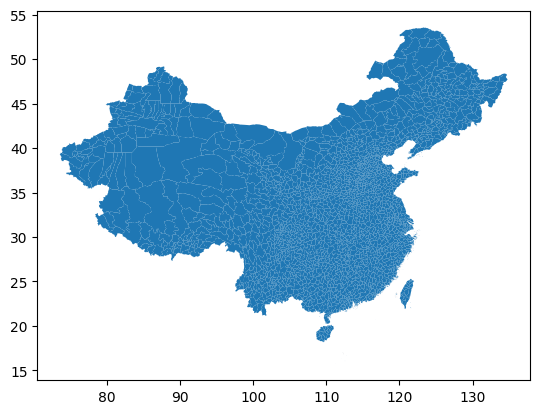

In [5]:
china = gamd_file[(gamd_file["NAME_0"] == "China") | (gamd_file["NAME_0"] == "Taiwan") | (gamd_file["NAME_0"] == "Paracel Islands")]
china.plot()

In [7]:
# del gamd_file
china.to_file("H:\\Region\\GAMD_410\\China_corr\\GAMD_410_China.gpkg", driver="GPKG")

cx索引器可以也只可以用于索引经纬度范围，只要该区划选取的矩形区域有重叠就会被选取，我觉得可能判断某个经纬度点属于哪个区划会更重要一点（？

<AxesSubplot:>

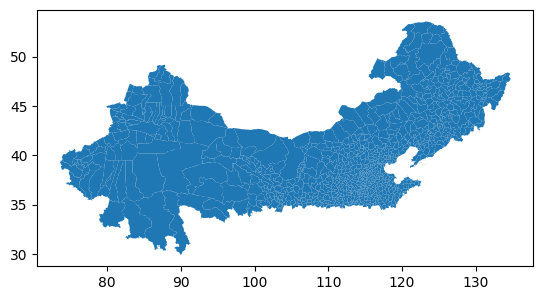

In [8]:
china.cx[:, 35:].plot()

<AxesSubplot:>

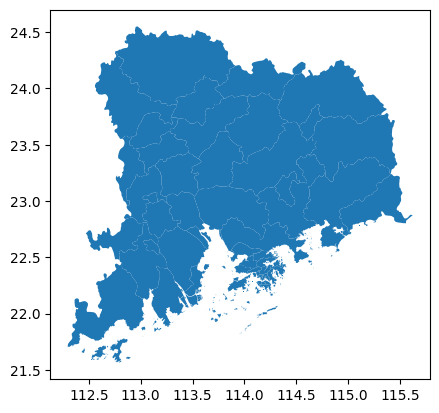

In [9]:
china.cx[113: 115, 22: 24].plot()

In [10]:
# 东莞区划的多边形，顺便一提东莞最细就到整个东莞的区划，广州的话还分为了几个区
china[china["NAME_2"] == "Dongguan"]["geometry"]

42706    MULTIPOLYGON (((114.12109 23.05014, 114.12822 ...
Name: geometry, dtype: geometry

In [11]:
china[china["NAME_2"] == "Dongguan"]

,UID,GID_0,NAME_0,VARNAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,ISO_1,HASC_1,...,ENGTYPE_5,GOVERNEDBY,SOVEREIGN,DISPUTEDBY,REGION,VARREGION,COUNTRY,CONTINENT,SUBCONT,geometry
42706,42707,CHN,China,,CHN.6_1,Guangdong,Guǎngdōng,廣東|广东,CN-GD,CN.GD,...,,,China,,,,China,Asia,,"MULTIPOLYGON (((114.12109 23.05014, 114.12822 ..."


<AxesSubplot:>

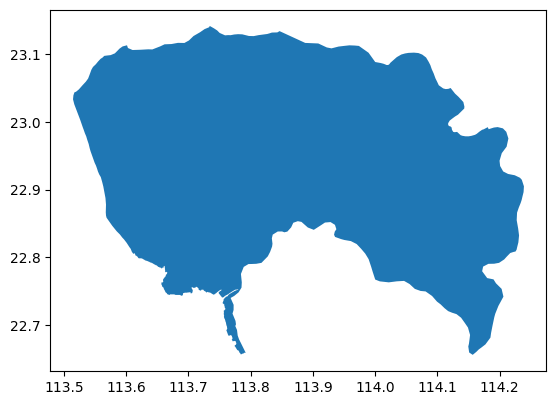

In [12]:
# 单点索引办法：contains，适用于单列，即GeoSeries

from shapely.geometry import Point
test = Point(113.9, 22.9)

# 单点索引到东莞市
china[china["NAME_2"] == china[china["geometry"].contains(test)]["NAME_2"].iloc[0]].plot()

<AxesSubplot:>

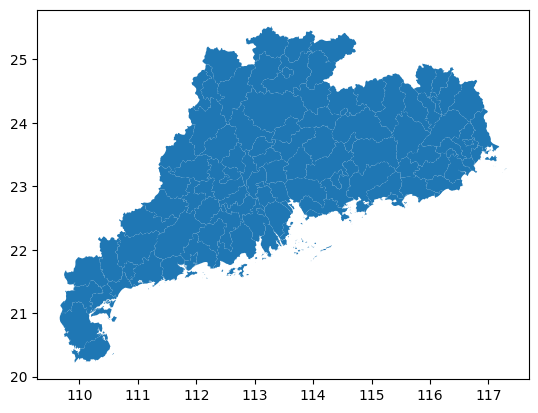

In [13]:
# 单点索引到整个广东
china[china["NAME_1"] == china[china["geometry"].contains(test)]["NAME_1"].iloc[0]].plot()

In [14]:
import numpy as np
china_grid = np.zeros((180, 360))
china_grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
def index2coord(lat, lon):
    return lat - 89.5, lon - 179.5

for lat in range(180):
    for lon in range(360):
        point = Point(*index2coord(lat, lon)[::-1])  # turn (lat_index, lon_index) to lon, lat
        region = china[china["geometry"].contains(point)]
        if region.shape[0] == 1:
            china_grid[lat, lon] = 1.0

In [18]:
china[china["geometry"].contains(Point(0, 0))].shape

(0, 53)

In [21]:
china_grid.sum()

955.0

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.rcParams['font.sans-serif']=['SimHei']  # 中文
plt.rcParams['axes.unicode_minus']=False    # 负号

C:\Users\alzio\AppData\Local\Temp\ipykernel_13088\4101433771.py:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


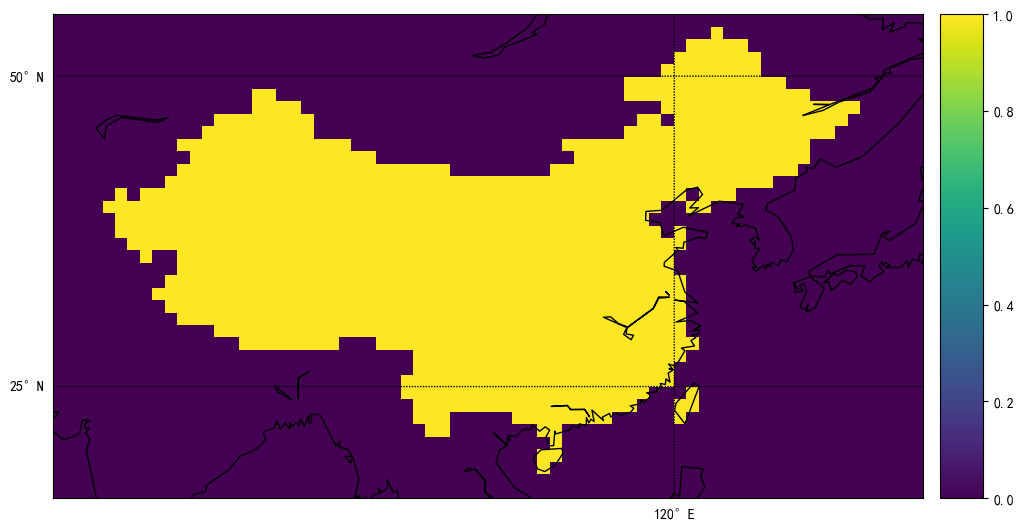

In [27]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=70., llcrnrlat=16., urcrnrlon=140., urcrnrlat=55.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, china_grid, cmap='viridis', vmin=0.0, vmax=1.0)
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

# 吴思太牛！！！！！！！